import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = tf.keras.layers.Input(shape=(5,))
hidden = tf.keras.layers.Dense(2000, activation="relu", name="hidden", trainable = False)
outputs = tf.keras.layers.Dense(1)(hidden(inputs))
model = tf.keras.models.Model(inputs = inputs, outputs = outputs)


model.summary()

model.compile(optimizer='sgd', loss = 'mse')
model.metrics_names

In [1]:
import numpy as np
np.random.seed(1)
x1, x2 = np.random.normal(size = (200, 5)), np.random.normal(size = (20, 5))
beta, delta = 10 * np.array([1, 1, 0, 0, 0]).reshape((-1,1)),\
     np.array([0, 0, 1, 1, 1]).reshape((-1,1))
y1, y2 = x1 @ (beta + delta) + 0.1 * np.random.normal(size=(200, 1)), x2 @ (beta - delta) + 0.1 * np.random.normal(size = (20, 1))
x, y = np.vstack((x1, x2)), np.vstack((y1, y2))

In [2]:
x_test = np.random.normal(size = (1000, 5))
y_test = x_test @ (beta + delta) + 0.1 * np.random.normal(size = (1000, 1))

model.fit(x, y, epochs = 200)

model.evaluate(x_test, y_test)

In [3]:
from scipy.linalg import inv
w = np.random.normal(size = (5, 2000))#/np.sqrt(2000)

In [4]:
def hidden_layer(x, w):
    z = x @ w
    z[z<0]=0
    return z

In [5]:
z = hidden_layer(x, w)

u, s, v = np.linalg.svd(z)

def predict(x, weights):
    w, beta = weights
    z = hidden_layer(x, w)
    return z @ beta

def evaluate(data, weights, sample_weight = []):
    x, y = data
    n, _ = x.shape
    if sample_weight == []:
        sample_weight = np.array([1]*n)
    sample_weight = sample_weight/np.sum(sample_weight)
    y_hat = predict(x, weights)
    error = (y - y_hat).reshape((-1,))
    return np.sum(error ** 2  * sample_weight)

y_hat = predict(x, [w, beta])

(z @ z.T) @ inv(z @ z.T)

z @ z.T

z.shape

In [6]:
beta = np.linalg.lstsq(z, y)[0]

In [7]:
np.mean((z @ beta - y)**2)

6.525657039381172e-28

In [8]:
def hidden_layer(x, w):
    z = x @ w
    z[z<0]=0
    return z

def predict(x, weights):
    w, beta = weights
    z = hidden_layer(x, w)
    return z @ beta

def evaluate(data, weights, sample_weight = []):
    x, y = data
    n, _ = x.shape
    if sample_weight == []:
        sample_weight = np.array([1]*n)
    sample_weight = sample_weight/np.sum(sample_weight)
    y_hat = predict(x, weights)
    error = (y - y_hat).reshape((-1,))
    return np.sum(error ** 2  * sample_weight)

In [9]:
data = x, y
weights = w, beta
evaluate(data, weights)

6.525657039381172e-28

In [59]:
gammas = np.logspace(0.1, 1.)
pi     = 0.9
n      = 200
sims   = 10
SNR = 10
biases, predErrs = list(), list()

In [60]:
for gamma in gammas:
  d = np.rint(gamma * n).astype(int)

  bias, predErr = 0., 0.
  for i1 in range(sims):
    beta0 = np.random.randn(d)            # regression vec for min grp
    beta0 = SNR * beta0 / np.linalg.norm(beta0)
    delta = np.random.randn(d)            # diff b/w regression vecs for maj
    delta = delta / np.linalg.norm(delta) # and min grps
    
    # generate data from two group model
    X1, X0  = np.random.randn(np.rint(pi*n).astype(int),d),\
         np.random.randn(np.rint((1.-pi)*n).astype(int),d)
    z1, z0  = np.random.randn(np.rint(pi*n).astype(int)),\
         np.random.randn(np.rint((1.-pi)*n).astype(int))
    y1, y0 = X1 @ (beta0 + 0*delta) + z1, X0 @ (beta0 + delta) + z0
    X, y  = np.vstack((X1, X0)), np.hstack((y1, y0))


    X2  = np.random.randn(1000,d)
    z2  = np.random.randn(1000)
    y2 = X2 @ (beta0 + delta)+ z2
    

    betaHat = np.linalg.lstsq(X,y)[0]
    pred = X2 @ betaHat
    predErr += np.mean((pred - y2)**2)
    
    

  biases.append(bias / sims)
  predErrs.append(predErr / sims)


In [61]:
limBias    = (pi*(1-pi))/(gammas*(gammas-1.)) + pi/gammas
limPredErr = (SNR ** 2 + 1)*(1 - 1/gammas) + limBias + 1/(gammas-1)

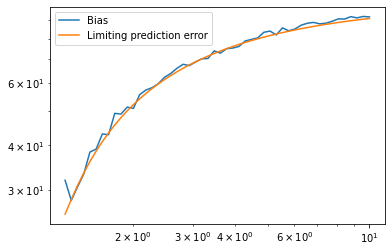

In [62]:
import matplotlib.pyplot as plt
plt.loglog(gammas, predErrs, label='Bias')
plt.loglog(gammas, limPredErr, label='Limiting prediction error')
plt.legend()
plt.show()

In [63]:
predErrs

[31.913225849357225,
 27.998744179774405,
 30.56024929501176,
 33.213301223404486,
 38.32829093449513,
 39.04530856534562,
 43.08670271738996,
 42.882555504762074,
 49.24364056871814,
 49.010414539659415,
 51.27259030162244,
 50.859676686807724,
 55.573461653038194,
 57.27123020076043,
 58.15609849813605,
 59.67391368064226,
 62.197602564846,
 63.759163038805426,
 65.92940279956157,
 67.68631422808576,
 67.11769516223902,
 68.69147766693467,
 70.12991891936488,
 70.27487429132536,
 73.83662374190233,
 72.73872996755017,
 74.89613707650605,
 75.19121818462494,
 75.99356006200128,
 78.75135871917027,
 79.53026248770122,
 80.29671372464435,
 83.29103240565782,
 83.93794555647601,
 81.8832688214652,
 85.70399289271407,
 84.09587109999367,
 85.07687970879593,
 87.20597534898647,
 88.31939431883815,
 88.79920908589668,
 87.97716323943366,
 88.36446355329029,
 89.4438695695271,
 90.85399088426252,
 90.75582839806377,
 92.17485207203255,
 91.45660572361955,
 92.29937106033786,
 92.029441726142

In [64]:
n, d = 2, 3
x = np.random.multivariate_normal(np.zeros(d), np.identity(d), n)
x = (x.T/np.linalg.norm(x, axis = 1)).T

In [65]:
x

array([[-0.40666002,  0.67334601,  0.61744051],
       [ 0.34825181,  0.38125257, -0.85636859]])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# simulation params
gammas = np.logspace(0., 2.)
gammas = 1/gammas
pi     = 0.9
n      = 200
sims   = 10

biases, predErrs = list(), list()
for gamma in gammas:
  d = np.rint(n * gamma).astype(int)

  bias, predErr = 0., 0.
  for i1 in range(sims):
    beta0 = np.random.randn(d)            # regression vec for min grp
    beta0 = 10 * beta0 / np.linalg.norm(beta0)
    delta = np.random.randn(d)            # diff b/w regression vecs for maj
    delta = delta / np.linalg.norm(delta) # and min grps
    
    # generate data from two group model
    X1, X0  = np.random.randn(np.rint(pi*n).astype(int),d), np.random.randn(np.rint((1.-pi)*n).astype(int),d)
    z1, z0  = np.random.randn(np.rint(pi*n).astype(int)), np.random.randn(np.rint((1.-pi)*n).astype(int))
    y1, y0 = X1 @ (beta0) + z1, X0 @ (beta0 + delta) + z0
    X, y  = np.vstack((X1, X0)), np.hstack((y1, y0))


    X2  = np.random.randn(1000,d)
    z2  = np.random.randn(1000)
    y2 = X2 @ (beta0 +delta)+ z2
    

    betaHat = np.linalg.lstsq(X,y)[0]
    pred = X2 @ betaHat
    predErr += np.mean((pred - y2)**2)
    
    

  biases.append(bias / sims)
  predErrs.append(predErr / sims)


In [6]:
gammas

array([1.        , 0.91029818, 0.82864277, 0.75431201, 0.68664885,
       0.62505519, 0.5689866 , 0.51794747, 0.47148664, 0.42919343,
       0.39069399, 0.35564803, 0.32374575, 0.29470517, 0.26826958,
       0.24420531, 0.22229965, 0.20235896, 0.184207  , 0.16768329,
       0.1526418 , 0.13894955, 0.12648552, 0.11513954, 0.10481131,
       0.09540955, 0.08685114, 0.07906043, 0.07196857, 0.06551286,
       0.05963623, 0.05428675, 0.04941713, 0.04498433, 0.04094915,
       0.03727594, 0.03393222, 0.03088844, 0.02811769, 0.02559548,
       0.02329952, 0.02120951, 0.01930698, 0.01757511, 0.01599859,
       0.01456348, 0.01325711, 0.01206793, 0.01098541, 0.01      ])

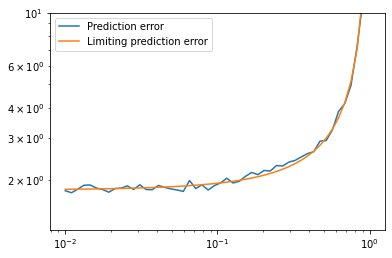

In [10]:
# limBias = (pi/gammas) / (1 - (1-pi)/gammas)
#gammas = 1/gammas
limBias    = (pi*(1-pi))/(gammas*(gammas-1.)) + pi/gammas
limPredErr =  gammas/(1-gammas) + pi * gammas / (1-gammas) + pi**2 * (1-2*gammas)/(1-gammas) + 1#101*(1 - 1/gammas) + limBias + 1/(gammas-1)

# plotting
# plt.loglog(gammas, biases, label='Bias')
# plt.loglog(gammas, limBias, label='Limiting bias')
plt.loglog(gammas, predErrs, label='Prediction error')
plt.loglog(gammas, limPredErr, label='Limiting prediction error')
plt.legend()
plt.ylim([0., 10.])
plt.show()